### 예측 단위 : 현재 추정 매출, 다음 분기 매출

In [1]:
# Import the module
import pandas as pd

pd.set_option('display.max_columns', 500)

In [2]:
## 2023년 추출 코드 필요하면 쓰세요
# data = pd.read_csv("../../data/raw data/상권/추정매출/서울시 상권분석서비스(추정매출-상권).csv", encoding="cp949")
# data = data[data['기준_년분기_코드'] >= 2023]
# data.to_csv('../../data/raw data/상권/추정매출/서울시_상권분석서비스(추정매출-상권)_2023년.csv', index=False)

## 개별 파일 병합

### 추정매출 sales

In [3]:
sales2019 = pd.read_csv("../../data/raw data/상권/추정매출/서울시_상권분석서비스(추정매출-상권)_2019년.csv", encoding="cp949")
sales2020 = pd.read_csv("../../data/raw data/상권/추정매출/서울시_상권분석서비스(추정매출-상권)_2020년.csv", encoding="cp949")
sales2021 = pd.read_csv("../../data/raw data/상권/추정매출/서울시_상권분석서비스(추정매출-상권)_2021년.csv", encoding="cp949")
sales2022 = pd.read_csv("../../data/raw data/상권/추정매출/서울시_상권분석서비스(추정매출-상권)_2022년.csv", encoding="cp949")
sales2023 = pd.read_csv("../../data/raw data/상권/추정매출/서울시_상권분석서비스(추정매출-상권)_2023년.csv")

In [4]:
sales2019.shape, sales2020.shape, sales2021.shape, sales2022.shape, sales2023.shape

((78405, 55), (79988, 55), (81826, 55), (83573, 55), (42119, 55))

In [5]:
sales = pd.concat([sales2019, sales2020, sales2021, sales2022, sales2023])
sales = sales.reset_index(drop=True)

In [6]:
sales['기준_년분기_코드'].unique()

array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
       20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232],
      dtype=int64)

### 집객시설 facilities

In [7]:
facilities = pd.read_csv("../../data/raw data/상권/집객시설/서울시 상권분석서비스(집객시설-상권).csv", encoding="cp949")

In [8]:
# 집객시설 - 2019년 1-4분기, 2020년 1-3분기 데이터 없음
facilities['기준_년분기_코드'].unique()

array([20232, 20233, 20231, 20224, 20223, 20222, 20221, 20214, 20213,
       20212, 20211, 20204], dtype=int64)

In [9]:
facilities.isnull().sum()

기준_년분기_코드         0
상권_구분_코드          0
상권_구분_코드_명        0
상권_코드             0
상권_코드_명           0
집객시설_수            0
관공서_수         11376
은행_수          13092
종합병원_수        18660
일반_병원_수       17352
약국_수           6828
유치원_수         17124
초등학교_수        18780
중학교_수         18888
고등학교_수        18804
대학교_수         17928
백화점_수         18804
슈퍼마켓_수        17676
극장_수          17928
숙박_시설_수       17196
공항_수          18924
철도_역_수        18936
버스_터미널_수      18912
지하철_역_수       16596
버스_정거장_수       3696
dtype: int64

In [10]:
facilities = facilities.fillna(0)
facilities.isnull().sum()

기준_년분기_코드     0
상권_구분_코드      0
상권_구분_코드_명    0
상권_코드         0
상권_코드_명       0
집객시설_수        0
관공서_수         0
은행_수          0
종합병원_수        0
일반_병원_수       0
약국_수          0
유치원_수         0
초등학교_수        0
중학교_수         0
고등학교_수        0
대학교_수         0
백화점_수         0
슈퍼마켓_수        0
극장_수          0
숙박_시설_수       0
공항_수          0
철도_역_수        0
버스_터미널_수      0
지하철_역_수       0
버스_정거장_수      0
dtype: int64

In [11]:
facilities2019 = facilities[(20191 <= facilities['기준_년분기_코드']) & (facilities['기준_년분기_코드'] <= 20194)]
facilities2020 = facilities[(20201 <= facilities['기준_년분기_코드']) & (facilities['기준_년분기_코드'] <= 20204)]
facilities2021 = facilities[(20211 <= facilities['기준_년분기_코드']) & (facilities['기준_년분기_코드'] <= 20214)]
facilities2022 = facilities[(20221 <= facilities['기준_년분기_코드']) & (facilities['기준_년분기_코드'] <= 20224)]
facilities2023 = facilities[(20231 <= facilities['기준_년분기_코드']) & (facilities['기준_년분기_코드'] <= 20234)]

In [12]:
# 2020년 1, 2, 3분기 데이터 생성(= 2020년 4분기 copy)
facilities20204 = facilities2020[facilities2020['기준_년분기_코드'] == 20204]

facilities20201 = facilities20204.copy()
facilities20202 = facilities20204.copy()
facilities20203 = facilities20204.copy()

facilities20201['기준_년분기_코드'] = 20201
facilities20202['기준_년분기_코드'] = 20202
facilities20203['기준_년분기_코드'] = 20203

print(facilities20201.shape, facilities20202.shape, facilities20203.shape, facilities20204.shape)

facilities2020 = pd.concat([facilities20201, facilities20202, facilities20203, facilities20204])
facilities2020 = facilities2020.reset_index(drop=True)

print(facilities2020['기준_년분기_코드'].unique())

(1578, 25) (1578, 25) (1578, 25) (1578, 25)
[20201 20202 20203 20204]


In [13]:
facilities2019.shape, facilities2020.shape, facilities2021.shape, facilities2022.shape, facilities2023.shape

((0, 25), (6312, 25), (6312, 25), (6312, 25), (4734, 25))

In [14]:
facilities = pd.concat([facilities2019, facilities2020, facilities2021, facilities2022, facilities2023])
facilities = facilities.reset_index(drop=True)

In [15]:
facilities['기준_년분기_코드'].unique()

array([20201, 20202, 20203, 20204, 20214, 20213, 20212, 20211, 20224,
       20223, 20222, 20221, 20232, 20233, 20231], dtype=int64)

### 직장인구 office_population

In [16]:
# 직장인구 데이터 load
office_population = pd.read_csv("../../data/raw data/상권/직장인구/서울시 상권분석서비스(직장인구-상권).csv", encoding="cp949")

In [17]:
# 직장인구 - 2019년 2-3분기 데이터 없음
office_population['기준_년분기_코드'].unique()

array([20191, 20212, 20194, 20213, 20221, 20222, 20223, 20224, 20202,
       20231, 20214, 20232, 20201, 20233, 20203, 20204, 20211],
      dtype=int64)

In [18]:
office_population.isnull().sum()

기준_년분기_코드              0
상권_구분_코드               0
상권_구분_코드_명             0
상권_코드                  0
상권_코드_명                0
총_직장_인구_수              0
남성_직장_인구_수             0
여성_직장_인구_수             0
연령대_10_직장_인구_수         0
연령대_20_직장_인구_수         0
연령대_30_직장_인구_수         0
연령대_40_직장_인구_수         0
연령대_50_직장_인구_수         0
연령대_60_이상_직장_인구_수      0
남성연령대_10_직장_인구_수       0
남성연령대_20_직장_인구_수       0
남성연령대_30_직장_인구_수       0
남성연령대_40_직장_인구_수       0
남성연령대_50_직장_인구_수       0
남성연령대_60_이상_직장_인구_수    0
여성연령대_10_직장_인구_수       0
여성연령대_20_직장_인구_수       0
여성연령대_30_직장_인구_수       0
여성연령대_40_직장_인구_수       0
여성연령대_50_직장_인구_수       0
여성연령대_60_이상_직장_인구_수    0
dtype: int64

In [19]:
office_population2019 = office_population[(20191 <= office_population['기준_년분기_코드']) & (office_population['기준_년분기_코드'] <= 20194)]
office_population2020 = office_population[(20201 <= office_population['기준_년분기_코드']) & (office_population['기준_년분기_코드'] <= 20204)]
office_population2021 = office_population[(20211 <= office_population['기준_년분기_코드']) & (office_population['기준_년분기_코드'] <= 20214)]
office_population2022 = office_population[(20221 <= office_population['기준_년분기_코드']) & (office_population['기준_년분기_코드'] <= 20224)]
office_population2023 = office_population[(20231 <= office_population['기준_년분기_코드']) & (office_population['기준_년분기_코드'] <= 20234)]

In [20]:
office_population2019.shape, office_population2020.shape, office_population2021.shape, office_population2022.shape, office_population2023.shape

((3267, 26), (6492, 26), (6492, 26), (6492, 26), (4869, 26))

In [21]:
# 2019년 2,3분기 데이터 생성(= 2019년 1분기 copy)
office_population20191 = office_population2019[office_population2019['기준_년분기_코드']==20191]
office_population20192 = office_population20191.copy()
office_population20193 = office_population20191.copy()
office_population20194 = office_population2019[office_population2019['기준_년분기_코드']==20194]

office_population20192['기준_년분기_코드'] = 20192
office_population20193['기준_년분기_코드'] = 20193

print(office_population20191.shape, office_population20192.shape, office_population20193.shape, office_population20194.shape)

office_population2019 = pd.concat([office_population20191, office_population20192, office_population20193, office_population20194])
office_population2019 = office_population2019.reset_index(drop=True)

print(office_population2019['기준_년분기_코드'].unique())

(1644, 26) (1644, 26) (1644, 26) (1623, 26)
[20191 20192 20193 20194]


In [22]:
office_population = pd.concat([office_population2019, office_population2020, office_population2021, office_population2022, office_population2023])
office_population = office_population.reset_index(drop=True)

In [23]:
office_population['기준_년분기_코드'].unique()

array([20191, 20192, 20193, 20194, 20202, 20201, 20203, 20204, 20212,
       20213, 20214, 20211, 20221, 20222, 20223, 20224, 20231, 20232,
       20233], dtype=int64)

### 점포 store

In [24]:
store2019 = pd.read_csv("../../data/raw data/상권/점포/서울시_상권분석서비스(점포-상권)_2019년.csv", encoding="cp949")
store2020 = pd.read_csv("../../data/raw data/상권/점포/서울시_상권분석서비스(점포-상권)_2020년.csv", encoding="cp949")
store2021 = pd.read_csv("../../data/raw data/상권/점포/서울시_상권분석서비스(점포-상권)_2021년.csv", encoding="cp949")
store2022 = pd.read_csv("../../data/raw data/상권/점포/서울시_상권분석서비스(점포-상권)_2022년.csv", encoding="cp949")
store2023 = pd.read_csv("../../data/raw data/상권/점포/서울시_상권분석서비스(점포-상권)_2023년.csv")

In [25]:
store2019.shape, store2020.shape, store2021.shape, store2022.shape, store2023.shape

((298601, 14), (301143, 14), (303483, 14), (304755, 14), (152288, 14))

In [26]:
store = pd.concat([store2019, store2020, store2021, store2022, store2023])
store = store.reset_index(drop=True)

In [27]:
store['기준_년분기_코드'].unique()

array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
       20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232],
      dtype=int64)

In [28]:
store.isnull().sum()

기준_년분기_코드      0
상권_구분_코드       0
상권_구분_코드_명     0
상권_코드          0
상권_코드_명        0
서비스_업종_코드      0
서비스_업종_코드_명    0
점포_수           0
유사_업종_점포_수     0
개업_율           0
개업_점포_수        0
폐업_률           0
폐업_점포_수        0
프랜차이즈_점포_수     0
dtype: int64

### 영역 area

In [29]:
area = pd.read_csv("../../data/raw data/상권/영역/서울시 상권분석서비스(영역-상권).csv", encoding="cp949")
area

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,A,골목상권,3110008,배화여자대학교(박노수미술관),197093,453418,11110,종로구,11110515,청운효자동,149264
1,A,골목상권,3110009,자하문터널,196991,455057,11110,종로구,11110550,부암동,178306
2,A,골목상권,3110010,평창동서측,197064,456643,11110,종로구,11110560,평창동,369415
3,A,골목상권,3110017,정독도서관,198581,453781,11110,종로구,11110600,가회동,83855
4,A,골목상권,3110018,중앙고등학교,198883,453690,11110,종로구,11110600,가회동,166872
...,...,...,...,...,...,...,...,...,...,...,...
1645,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,198397,451614,11140,중구,11140520,소공동,983618
1646,U,관광특구,3001493,동대문패션타운 관광특구,200996,451976,11140,중구,11140590,광희동,606058
1647,U,관광특구,3001494,종로?청계 관광특구,199796,452274,11110,종로구,11110615,종로1?2?3?4가동,653127
1648,U,관광특구,3001495,잠실 관광특구,210188,446334,11710,송파구,11710562,방이2동,2462734


In [30]:
area.isnull().sum()

상권_구분_코드      0
상권_구분_코드_명    0
상권_코드         0
상권_코드_명       0
엑스좌표_값        0
와이좌표_값        0
자치구_코드        0
자치구_코드_명      0
행정동_코드        0
행정동_코드_명      0
영역_면적         0
dtype: int64

### 아파트 apartment

In [31]:
apartment = pd.read_csv("../../data/raw data/상권/아파트/서울시 상권분석서비스(아파트-상권).csv", encoding="cp949")

In [32]:
# 아파트 - 2019년 1-3분기 데이터 없음
apartment['기준_년분기_코드'].unique()

array([20233, 20232, 20231, 20224, 20223, 20222, 20221, 20214, 20213,
       20212, 20211, 20204, 20203, 20202, 20201, 20194], dtype=int64)

In [33]:
apartment.isnull().sum()

기준_년분기_코드                     0
상권_구분_코드                      0
상권_구분_코드_명                    0
상권_코드                         0
상권_코드_명                       0
아파트_단지_수                      0
아파트_면적_66_제곱미터_미만_세대_수      576
아파트_면적_66_제곱미터_세대_수        1864
아파트_면적_99_제곱미터_세대_수        8656
아파트_면적_132_제곱미터_세대_수      15592
아파트_면적_165_제곱미터_세대_수      18672
아파트_가격_1_억_미만_세대_수         4524
아파트_가격_1_억_세대_수            1588
아파트_가격_2_억_세대_수            2464
아파트_가격_3_억_세대_수            8576
아파트_가격_4_억_세대_수           13860
아파트_가격_5_억_세대_수           16864
아파트_가격_6_억_이상_세대_수        17668
아파트_평균_면적                     0
아파트_평균_시가                     0
dtype: int64

In [34]:
apartment = apartment.fillna(0)
apartment.isnull().sum()

기준_년분기_코드                 0
상권_구분_코드                  0
상권_구분_코드_명                0
상권_코드                     0
상권_코드_명                   0
아파트_단지_수                  0
아파트_면적_66_제곱미터_미만_세대_수    0
아파트_면적_66_제곱미터_세대_수       0
아파트_면적_99_제곱미터_세대_수       0
아파트_면적_132_제곱미터_세대_수      0
아파트_면적_165_제곱미터_세대_수      0
아파트_가격_1_억_미만_세대_수        0
아파트_가격_1_억_세대_수           0
아파트_가격_2_억_세대_수           0
아파트_가격_3_억_세대_수           0
아파트_가격_4_억_세대_수           0
아파트_가격_5_억_세대_수           0
아파트_가격_6_억_이상_세대_수        0
아파트_평균_면적                 0
아파트_평균_시가                 0
dtype: int64

In [35]:
apartment2019 = apartment[(20191 <= apartment['기준_년분기_코드']) & (apartment['기준_년분기_코드'] <= 20194)]
apartment2020 = apartment[(20201 <= apartment['기준_년분기_코드']) & (apartment['기준_년분기_코드'] <= 20204)]
apartment2021 = apartment[(20211 <= apartment['기준_년분기_코드']) & (apartment['기준_년분기_코드'] <= 20214)]
apartment2022 = apartment[(20221 <= apartment['기준_년분기_코드']) & (apartment['기준_년분기_코드'] <= 20224)]
apartment2023 = apartment[(20231 <= apartment['기준_년분기_코드']) & (apartment['기준_년분기_코드'] <= 20234)]

In [36]:
apartment2019.shape, apartment2020.shape, apartment2021.shape, apartment2022.shape, apartment2023.shape

((1484, 20), (5936, 20), (5916, 20), (5855, 20), (4389, 20))

In [37]:
apartment = pd.concat([apartment2019, apartment2020, apartment2021, apartment2022, apartment2023])
apartment = apartment.reset_index(drop=True)

### 소득소비 money

In [38]:
money = pd.read_csv("../../data/raw data/상권/소득소비/서울시 상권분석서비스(소득소비-상권).csv", encoding="cp949")

In [39]:
money['기준_년분기_코드'].unique()

array([20231, 20232, 20233, 20191, 20193, 20192, 20194, 20201, 20202,
       20203, 20204, 20211, 20212, 20213, 20214, 20221, 20222, 20223,
       20224], dtype=int64)

In [40]:
money.isnull().sum()

기준_년분기_코드          0
상권_구분_코드           0
상권_구분_코드_명         0
상권_코드              0
상권_코드_명            0
월_평균_소득_금액      1752
소득_구간_코드        1752
지출_총금액           624
식료품_지출_총금액       624
의류_신발_지출_총금액     624
생활용품_지출_총금액      624
의료비_지출_총금액       624
교통_지출_총금액        624
여가_지출_총금액        624
문화_지출_총금액        624
교육_지출_총금액        624
유흥_지출_총금액        624
dtype: int64

In [41]:
money = money.fillna(0)
money.isnull().sum()

기준_년분기_코드       0
상권_구분_코드        0
상권_구분_코드_명      0
상권_코드           0
상권_코드_명         0
월_평균_소득_금액      0
소득_구간_코드        0
지출_총금액          0
식료품_지출_총금액      0
의류_신발_지출_총금액    0
생활용품_지출_총금액     0
의료비_지출_총금액      0
교통_지출_총금액       0
여가_지출_총금액       0
문화_지출_총금액       0
교육_지출_총금액       0
유흥_지출_총금액       0
dtype: int64

In [42]:
money2019 = money[(20191 <= money['기준_년분기_코드']) & (money['기준_년분기_코드'] <= 20194)]
money2020 = money[(20201 <= money['기준_년분기_코드']) & (money['기준_년분기_코드'] <= 20204)]
money2021 = money[(20211 <= money['기준_년분기_코드']) & (money['기준_년분기_코드'] <= 20214)]
money2022 = money[(20221 <= money['기준_년분기_코드']) & (money['기준_년분기_코드'] <= 20224)]
money2023 = money[(20231 <= money['기준_년분기_코드']) & (money['기준_년분기_코드'] <= 20234)]

In [43]:
money2019.shape, money2020.shape, money2021.shape, money2022.shape, money2023.shape

((6518, 17), (6524, 17), (6524, 17), (6524, 17), (4858, 17))

In [44]:
money = pd.concat([money2019, money2020, money2021, money2022, money2023])
money = money.reset_index(drop=True)

### 생활인구 de_facto_population

In [45]:
de_facto_population = pd.read_csv("../../data/raw data/상권/생활인구/서울시 상권분석서비스(길단위인구-상권).csv", encoding="cp949")

In [46]:
de_facto_population['기준_년분기_코드'].unique()

array([20233, 20232, 20231, 20224, 20223, 20222, 20221, 20214, 20213,
       20212, 20211, 20204, 20203, 20202, 20201, 20194, 20193, 20192,
       20191], dtype=int64)

In [47]:
de_facto_population.isnull().sum()

기준_년분기_코드           0
상권_구분_코드            0
상권_구분_코드_명          0
상권_코드               0
상권_코드_명             0
총_유동인구_수            0
남성_유동인구_수           0
여성_유동인구_수           0
연령대_10_유동인구_수       0
연령대_20_유동인구_수       0
연령대_30_유동인구_수       0
연령대_40_유동인구_수       0
연령대_50_유동인구_수       0
연령대_60_이상_유동인구_수    0
시간대_00_06_유동인구_수    0
시간대_06_11_유동인구_수    0
시간대_11_14_유동인구_수    0
시간대_14_17_유동인구_수    0
시간대_17_21_유동인구_수    0
시간대_21_24_유동인구_수    0
월요일_유동인구_수          0
화요일_유동인구_수          0
수요일_유동인구_수          0
목요일_유동인구_수          0
금요일_유동인구_수          0
토요일_유동인구_수          0
일요일_유동인구_수          0
dtype: int64

In [48]:
de_facto_population2019 = de_facto_population[(20191 <= de_facto_population['기준_년분기_코드']) & (de_facto_population['기준_년분기_코드'] <= 20194)]
de_facto_population2020 = de_facto_population[(20201 <= de_facto_population['기준_년분기_코드']) & (de_facto_population['기준_년분기_코드'] <= 20204)]
de_facto_population2021 = de_facto_population[(20211 <= de_facto_population['기준_년분기_코드']) & (de_facto_population['기준_년분기_코드'] <= 20214)]
de_facto_population2022 = de_facto_population[(20221 <= de_facto_population['기준_년분기_코드']) & (de_facto_population['기준_년분기_코드'] <= 20224)]
de_facto_population2023 = de_facto_population[(20231 <= de_facto_population['기준_년분기_코드']) & (de_facto_population['기준_년분기_코드'] <= 20234)]

In [49]:
de_facto_population2019.shape, de_facto_population2020.shape, de_facto_population2021.shape, de_facto_population2022.shape, de_facto_population2023.shape

((6600, 27), (6600, 27), (6600, 27), (6599, 27), (4947, 27))

In [50]:
de_facto_population = pd.concat([de_facto_population2019, de_facto_population2020, de_facto_population2021, de_facto_population2022, de_facto_population2023])
de_facto_population = de_facto_population.reset_index(drop=True)

### 상주인구 de_jure_population

In [51]:
de_jure_population = pd.read_csv("../../data/raw data/상권/상주인구/서울시 상권분석서비스(상주인구-상권).csv", encoding="cp949")

In [52]:
# 상주인구 - 2019년 1-3분기 데이터 없음
de_jure_population['기준_년분기_코드'].unique()

array([20194, 20201, 20202, 20203, 20204, 20211, 20212, 20213, 20214,
       20221, 20222, 20223, 20224, 20231, 20232, 20233], dtype=int64)

In [53]:
de_jure_population.isnull().sum()

기준_년분기_코드             0
상권_구분_코드              0
상권_구분_코드_명            0
상권_코드                 0
상권_코드_명               0
총_상주인구_수              0
남성_상주인구_수             0
여성_상주인구_수             0
연령대_10_상주인구_수         0
연령대_20_상주인구_수         0
연령대_30_상주인구_수         0
연령대_40_상주인구_수         0
연령대_50_상주인구_수         0
연령대_60_이상_상주인구_수      0
남성연령대_10_상주인구_수       0
남성연령대_20_상주인구_수       0
남성연령대_30_상주인구_수       0
남성연령대_40_상주인구_수       0
남성연령대_50_상주인구_수       0
남성연령대_60_이상_상주인구_수    0
여성연령대_10_상주인구_수       0
여성연령대_20_상주인구_수       0
여성연령대_30_상주인구_수       0
여성연령대_40_상주인구_수       0
여성연령대_50_상주인구_수       0
여성연령대_60_이상_상주인구_수    0
총_가구_수                0
아파트_가구_수              0
비_아파트_가구_수            0
dtype: int64

In [54]:
de_jure_population2019 = de_jure_population[(20191 <= de_jure_population['기준_년분기_코드']) & (de_jure_population['기준_년분기_코드'] <= 20194)]
de_jure_population2020 = de_jure_population[(20201 <= de_jure_population['기준_년분기_코드']) & (de_jure_population['기준_년분기_코드'] <= 20204)]
de_jure_population2021 = de_jure_population[(20211 <= de_jure_population['기준_년분기_코드']) & (de_jure_population['기준_년분기_코드'] <= 20214)]
de_jure_population2022 = de_jure_population[(20221 <= de_jure_population['기준_년분기_코드']) & (de_jure_population['기준_년분기_코드'] <= 20224)]
de_jure_population2023 = de_jure_population[(20231 <= de_jure_population['기준_년분기_코드']) & (de_jure_population['기준_년분기_코드'] <= 20234)]

In [55]:
de_jure_population2019.shape, de_jure_population2020.shape, de_jure_population2021.shape, de_jure_population2022.shape, de_jure_population2023.shape

((1634, 29), (6536, 29), (6536, 29), (6527, 29), (4878, 29))

In [56]:
de_jure_population = pd.concat([de_jure_population2019, de_jure_population2020, de_jure_population2021, de_jure_population2022, de_jure_population2023])
de_jure_population = de_jure_population.reset_index(drop=True)

## 비교

In [57]:
# 추정매출 sales, 집객시설 facilites
sales_code = list(sales['상권_코드'].drop_duplicates())
facilities_code = list(facilities['상권_코드'].drop_duplicates())

none_facilites = []

for s in sales_code:
    if s not in facilities_code:
        none_facilites.append(s)
        
print(len(none_facilites))
for code in none_facilites:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

58
3130247 ['우리시장'] ['전통시장']
3110965 ['언주역 6번'] ['골목상권']
3130249 ['동남상가'] ['전통시장']
3130189 ['서교시장'] ['전통시장']
3130173 ['백련시장'] ['전통시장']
3130060 ['신흥시장'] ['전통시장']
3130033 ['대림상가(청계상가)'] ['전통시장']
3130292 ['봉천현대시장'] ['전통시장']
3111048 ['천호역 1번(천호문구완구거리)'] ['골목상권']
3110977 ['논현로18길'] ['골목상권']
3130228 ['구로시장'] ['전통시장']
3130302 ['강남시장(강남구 강남시장)'] ['전통시장']
3130270 ['흑석시장'] ['전통시장']
3130178 ['이대 앞 스타트업 상점가'] ['전통시장']
3110763 ['영등포구청역 2번'] ['골목상권']
3110386 ['연산군묘'] ['골목상권']
3130269 ['강남시장(동작구 강남시장)'] ['전통시장']
3110610 ['계남근린공원'] ['골목상권']
3130224 ['개봉프라자(고척근린시장)'] ['전통시장']
3111050 ['강동구청(강동구청역 2번)'] ['골목상권']
3130250 ['삼구시장(로타리상가)'] ['전통시장']
3110946 ['청계산원터골'] ['골목상권']
3130201 ['월정로시장'] ['전통시장']
3110685 ['금강수목원아파트'] ['골목상권']
3110623 ['갈산공원'] ['골목상권']
3110044 ['관성묘'] ['골목상권']
3110239 ['중랑역 2번'] ['골목상권']
3110991 ['삼성중앙역 5번'] ['골목상권']
3110986 ['삼성중앙역 7번'] ['골목상권']
3110938 ['바우뫼공원'] ['골목상권']
3110145 ['장안초등학교'] ['골목상권']
3110937 ['방아다리근린공원(횃불트리니티신학대학원대학교)'] ['골목상권']
3110223 ['군자초등학교'] ['골목상권']
3110963 ['역삼

In [58]:
# 추정매출 sales, 직장인구 office_population
sales_code = list(sales['상권_코드'].drop_duplicates())
office_population_code = list(office_population['상권_코드'].drop_duplicates())

none_office = []

for s in sales_code:
    if s not in office_population_code:
        none_office.append(s)
        
print(len(none_office))
for code in none_office:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

0


In [59]:
# 추정매출 sales, 점포 store
sales_code = list(sales['상권_코드'].drop_duplicates())
store_code = list(store['상권_코드'].drop_duplicates())

none_store = []

for s in sales_code:
    if s not in store_code:
        none_store.append(s)
        
print(len(none_store))
for code in none_store:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

0


In [60]:
# 추정매출 sales, 영역 area
sales_code = list(sales['상권_코드'].drop_duplicates())
area_code = list(area['상권_코드'].drop_duplicates())

none_area = []

for s in sales_code:
    if s not in area_code:
        none_area.append(s)
        
print(len(none_area))
for code in none_area:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

0


In [61]:
# 추정매출 sales, 아파트 apartment
sales_code = list(sales['상권_코드'].drop_duplicates())
apartment_code = list(apartment['상권_코드'].drop_duplicates())

none_apartment = []

for s in sales_code:
    if s not in apartment_code:
        none_apartment.append(s)
        
print(len(none_apartment))
for code in none_apartment:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

143
3001492 ['명동 남대문 북창동 다동 무교동 관광특구'] ['관광특구']
3120148 ['국회의사당역(국회의사당)'] ['발달상권']
3130095 ['청량리전통시장'] ['전통시장']
3130247 ['우리시장'] ['전통시장']
3120020 ['시청역_1번'] ['발달상권']
3120043 ['서울역'] ['발달상권']
3130205 ['신곡종합시장(신월6동 골목시장)'] ['전통시장']
3130094 ['청량리청과물시장'] ['전통시장']
3130120 ['돈암시장(돈암제일시장)'] ['전통시장']
3120022 ['북창동(시청역_6번)'] ['발달상권']
3120083 ['등나무근린공원'] ['발달상권']
3001496 ['강남 마이스 관광특구'] ['관광특구']
3120033 ['을지로4가역'] ['발달상권']
3130131 ['동북프라자'] ['전통시장']
3130025 ['삼익패션타운(남대문시장)'] ['전통시장']
3130024 ['남대문시장(자유상가)'] ['전통시장']
3130248 ['영등포역지하도상점가'] ['전통시장']
3120060 ['강변역(테크노마트)'] ['발달상권']
3130134 ['솔샘시장(미아6,7동골목시장)'] ['전통시장']
3120224 ['수서역'] ['발달상권']
3120030 ['중부경찰서(영화인의거리)'] ['발달상권']
3130113 ['신아타운'] ['전통시장']
3110667 ['가양역 10번'] ['골목상권']
3120029 ['을지로2가'] ['발달상권']
3130005 ['세운상가가동'] ['전통시장']
3120008 ['인사동'] ['발달상권']
3130010 ['종로신진시장'] ['전통시장']
3130022 ['숭례문수입상가(남대문시장)'] ['전통시장']
3120025 ['롯데백화점(시청광장 지하쇼핑센터)'] ['발달상권']
3130031 ['청계천공구상가'] ['전통시장']
3120140 ['문래동주민센터'] ['발달상권']
3120026 ['을지로입구역'] ['발달상권']
3

In [62]:
# 추정매출 sales, 소득소비 money
sales_code = list(sales['상권_코드'].drop_duplicates())
money_code = list(money['상권_코드'].drop_duplicates())

none_money = []

for s in sales_code:
    if s not in money_code:
        none_money.append(s)
        
print(len(none_money))
for code in none_money:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

12
3130022 ['숭례문수입상가(남대문시장)'] ['전통시장']
3130304 ['신사상가'] ['전통시장']
3120231 ['가락시장'] ['발달상권']
3120099 ['월드컵경기장역(월드컵경기장)'] ['발달상권']
3130184 ['마포농수산물시장'] ['전통시장']
3120115 ['김포공항역(김포공항)'] ['발달상권']
3111002 ['한국교통안전공단 강남자동차검사소'] ['골목상권']
3110793 ['대림썬프라자'] ['골목상권']
3130009 ['마전교지하쇼핑센터(구 한일상가)'] ['전통시장']
3130096 ['동부시장'] ['전통시장']
3130174 ['연희사러가'] ['전통시장']
3130142 ['강북북부시장'] ['전통시장']


In [63]:
# 추정매출 sales, 생활인구 de_facto_population
sales_code = list(sales['상권_코드'].drop_duplicates())
de_facto_population_code = list(de_facto_population['상권_코드'].drop_duplicates())

none_facto = []

for s in sales_code:
    if s not in de_facto_population_code:
        none_facto.append(s)
        
print(len(none_facto))
for code in none_facto:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

0


In [64]:
# 추정매출 sales, 상주인구 de_jure_population
sales_code = list(sales['상권_코드'].drop_duplicates())
de_jure_population_code = list(de_jure_population['상권_코드'].drop_duplicates())

none_jure = []

for s in sales_code:
    if s not in de_jure_population_code:
        none_jure.append(s)
        
print(len(none_jure))
for code in none_jure:
    print(code, sales.loc[sales['상권_코드'] == code, '상권_코드_명'].drop_duplicates().values, sales.loc[sales['상권_코드'] == code, '상권_구분_코드_명'].drop_duplicates().values)

10
3130022 ['숭례문수입상가(남대문시장)'] ['전통시장']
3120137 ['문래역(문래로데오거리)'] ['발달상권']
3120231 ['가락시장'] ['발달상권']
3120099 ['월드컵경기장역(월드컵경기장)'] ['발달상권']
3130184 ['마포농수산물시장'] ['전통시장']
3120115 ['김포공항역(김포공항)'] ['발달상권']
3111002 ['한국교통안전공단 강남자동차검사소'] ['골목상권']
3130096 ['동부시장'] ['전통시장']
3130174 ['연희사러가'] ['전통시장']
3130142 ['강북북부시장'] ['전통시장']


In [65]:
len(none_facilites), len(none_office), len(none_store), len(none_area), len(none_apartment), len(none_money), len(none_facto), len(none_jure)

(58, 0, 0, 0, 143, 12, 0, 10)

In [66]:
len(set(none_facilites) - set(none_apartment)) # 집객시설 겹치지 않는 데이터 43개 -> 추정매출에 없는 상권 총 186개(143+43) drop 예정

43

In [67]:
len(set(none_money) - set(none_apartment)) # 소득소비: 모두 아파트에 포함됨

0

In [68]:
len(set(none_jure) - set(none_apartment)) # 상주인구: 모두 아파트에 포함됨

0

In [69]:
# 최종적으로 추정매출에 없는 상권_코드 186개
none_code = list(set(none_facilites) - set(none_apartment))
none_code += none_apartment
len(none_code)

186

## 전체 파일 병합
- `on=['기준_년분기_코드', '상권_구분_코드', '상권_코드']`
- `on=['기준_년분기_코드', '상권_구분_코드', '상권_코드', '서비스_업종_코드']`

In [70]:
# sales + facilities

In [71]:
sales.shape, facilities.shape

((365911, 55), (23670, 25))

In [72]:
facilities = facilities.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = sales.merge(facilities, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드'])
temp.shape

(365911, 75)

In [73]:
# sales + facilities + office_population

In [74]:
temp.shape, office_population.shape

((365911, 75), (30900, 26))

In [75]:
office_population = office_population.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = temp.merge(office_population, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드'])
temp.shape

(365911, 96)

In [76]:
# sales + facilities + office_population + store

In [77]:
temp.shape, store.shape

((365911, 96), (1360270, 14))

In [78]:
store = store.drop(columns=['상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명'])

temp = temp.merge(store, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드', '서비스_업종_코드'])
temp.shape

(365911, 103)

In [79]:
# sales + facilities + office_population + store + area

In [80]:
temp.shape, area.shape

((365911, 103), (1650, 11))

In [81]:
area = area.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = temp.merge(area, how='left', on=['상권_구분_코드', '상권_코드'])
temp.shape

(365911, 110)

In [82]:
# sales + facilities + office_population + store + area + apartment

In [83]:
temp.shape, apartment.shape

((365911, 110), (23580, 20))

In [84]:
apartment = apartment.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = temp.merge(apartment, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드'])
temp.shape

(365911, 125)

In [85]:
# sales + facilities + office_population + store + area + apartment + money

In [86]:
temp.shape, money.shape

((365911, 125), (30948, 17))

In [87]:
money = money.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = temp.merge(money, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드'])
temp.shape

(365911, 137)

In [88]:
# sales + facilities + office_population + store + area + apartment + money + de_facto_population

In [89]:
temp.shape, de_facto_population.shape

((365911, 137), (31346, 27))

In [90]:
de_facto_population = de_facto_population.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = temp.merge(de_facto_population, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드'])
temp.shape

(365911, 159)

In [91]:
# sales + facilities + office_population + store + area + apartment + money + de_facto_population + de_jure_population

In [92]:
temp.shape, de_jure_population.shape

((365911, 159), (26111, 29))

In [93]:
de_jure_population = de_jure_population.drop(columns=['상권_구분_코드_명', '상권_코드_명'])

temp = temp.merge(de_jure_population, how='left', on=['기준_년분기_코드', '상권_구분_코드', '상권_코드'])
temp.shape

(365911, 183)

### csv 파일로 저장

In [94]:
market_data = temp.copy()

In [95]:
market_data.shape

(365911, 183)

#### '상권_코드_명', '행정동_코드_명' replace
- 같은 `상권 코드`를 사용하는 `상권_코드_명`이 존재함을 발견 → 같은 이름 but, `.`이 `?`로 표시됨
- `행정동_코드_명`에서 `?`로 나타나는 값이 존재함을 발견
- 두 컬럼에서 `?`를 `?`으로 replace 작업 진행

In [96]:
market_data['상권_코드'].nunique(), market_data['상권_코드_명'].nunique()

(1577, 1578)

In [97]:
temp = market_data[['상권_코드', '상권_코드_명']].drop_duplicates()
temp

,상권_코드,상권_코드_명
0,3120037,동대문역사문화공원역
1,3001492,명동 남대문 북창동 다동 무교동 관광특구
2,3110085,경리단길남측
3,3110166,구의1동주민센터
4,3110161,중곡역 3번
...,...,...
240453,3130046,team204(팀204)
254243,3110017,정독도서관
321225,3130288,신림현대종합상가
344687,3001494,종로?청계 관광특구


In [98]:
temp[temp['상권_코드'].duplicated()]

,상권_코드,상권_코드_명
344687,3001494,종로?청계 관광특구


In [99]:
temp[temp['상권_코드'] == 3001494]

,상권_코드,상권_코드_명
93,3001494,종로·청계 관광특구
344687,3001494,종로?청계 관광특구


In [100]:
market_data['상권_코드_명'] = market_data['상권_코드_명'].str.replace('?', '·', regex=False)
market_data['행정동_코드_명'] = market_data['행정동_코드_명'].str.replace('?', '·', regex=False)

In [101]:
market_data['상권_코드'].nunique(), market_data['상권_코드_명'].nunique()

(1577, 1577)

#### 추정매출에 없는 상권 코드는 제외하고 full_data 저장
- `none_code`
- 186개

In [102]:
market_data[market_data['상권_코드'].isin(none_code)]['상권_코드'].shape # 26384행

(26384,)

In [103]:
market_data[market_data['상권_코드'].isin(none_code)]['상권_코드'].nunique() # 186개 확인

186

In [104]:
market_data = market_data[~(market_data['상권_코드'].isin(none_code))] # none_code에 포함되지 않는 상권_코드
market_data.shape

(339527, 183)

In [105]:
none = market_data.isnull().sum()
none[none > 0]

집객시설_수                72724
관공서_수                 72724
은행_수                  72724
종합병원_수                72724
일반_병원_수               72724
                      ...  
여성연령대_50_상주인구_수       54417
여성연령대_60_이상_상주인구_수    54417
총_가구_수                54417
아파트_가구_수              54417
비_아파트_가구_수            54417
Length: 80, dtype: int64

In [106]:
michin = market_data.copy()
temp = michin[michin['기준_년분기_코드'] >= 20201].isnull().sum()
temp[temp > 0]

총_직장_인구_수                  332
남성_직장_인구_수                 332
여성_직장_인구_수                 332
연령대_10_직장_인구_수             332
연령대_20_직장_인구_수             332
연령대_30_직장_인구_수             332
연령대_40_직장_인구_수             332
연령대_50_직장_인구_수             332
연령대_60_이상_직장_인구_수          332
남성연령대_10_직장_인구_수           332
남성연령대_20_직장_인구_수           332
남성연령대_30_직장_인구_수           332
남성연령대_40_직장_인구_수           332
남성연령대_50_직장_인구_수           332
남성연령대_60_이상_직장_인구_수        332
여성연령대_10_직장_인구_수           332
여성연령대_20_직장_인구_수           332
여성연령대_30_직장_인구_수           332
여성연령대_40_직장_인구_수           332
여성연령대_50_직장_인구_수           332
여성연령대_60_이상_직장_인구_수        332
아파트_단지_수                  2240
아파트_면적_66_제곱미터_미만_세대_수    2240
아파트_면적_66_제곱미터_세대_수       2240
아파트_면적_99_제곱미터_세대_수       2240
아파트_면적_132_제곱미터_세대_수      2240
아파트_면적_165_제곱미터_세대_수      2240
아파트_가격_1_억_미만_세대_수        2240
아파트_가격_1_억_세대_수           2240
아파트_가격_2_억_세대_수           2240
아파트_가격_3_억_세대_수           2240
아파트_가격_4_억_세대_수           2240
아파트_가격_5

#### csv로 저장

In [107]:
market_data.to_csv('../../data/preprocessed data/market_full_data.csv', index=False)

## 서비스 제공 업종 선별
- **외식업(10)**: 한식음식점, 커피-음료, 분식전문점, 호프-간이주점, 치킨전문점, 중식음식점, 패스트푸드점, 제과점, 일식음식점, 양식음식점
- **소매업(4)**: 편의점, 일반의류, 화장품, 의약품
- **서비스업(3)**: 일반교습학원, 미용실, 세탁소

In [108]:
import pandas as pd

pd.set_option('display.max_columns', 500)

In [109]:
full_data = pd.read_csv('../../data/preprocessed data/market_full_data.csv')
full_data.shape

(339527, 183)

In [110]:
full_data['서비스_업종_코드_명'].unique()

array(['네일숍', '피부관리실', '세탁소', '가전제품수리', '부동산중개업', '여관', '노래방', '슈퍼마켓',
       '육류판매', '편의점', '가방', '컴퓨터및주변장치판매', '핸드폰', '미곡판매', '수산물판매', '화초',
       '청과상', '반찬가게', '시계및귀금속', '일반의류', '신발', '안경', '의약품', '의료기기', '서적',
       '문구', '화장품', '운동/경기용품', '자전거 및 기타운송장비', '섬유제품', '애완동물', '가구',
       '가전제품', '철물점', '인테리어', '조명용품', '전자상거래업', '중식음식점', '분식전문점', '커피-음료',
       '일반교습학원', '예술학원', '치킨전문점', '자동차미용', '한식음식점', '일식음식점', '양식음식점',
       '제과점', '패스트푸드점', '호프-간이주점', '외국어학원', '스포츠 강습', '일반의원', '치과의원',
       '한의원', '당구장', '골프연습장', 'PC방', '스포츠클럽', '자동차수리', '미용실', '고시원', '완구'],
      dtype=object)

In [111]:
temp = full_data[['서비스_업종_코드', '서비스_업종_코드_명']].drop_duplicates()

food = temp[temp['서비스_업종_코드_명'].isin(['한식음식점', '커피-음료', '분식전문점', '호프-간이주점', '치킨전문점', '중식음식점', '패스트푸드점', '제과점', '일식음식점', '양식음식점'])].reset_index(drop=True)
retail = temp[temp['서비스_업종_코드_명'].isin(['편의점', '일반의류', '화장품', '의약품'])].reset_index(drop=True)
service = temp[temp['서비스_업종_코드_명'].isin(['일반교습학원', '미용실', '세탁소'])].reset_index(drop=True)

In [112]:
food

,서비스_업종_코드,서비스_업종_코드_명
0,CS100002,중식음식점
1,CS100008,분식전문점
2,CS100010,커피-음료
3,CS100007,치킨전문점
4,CS100001,한식음식점
5,CS100003,일식음식점
6,CS100004,양식음식점
7,CS100005,제과점
8,CS100006,패스트푸드점
9,CS100009,호프-간이주점


In [113]:
retail

,서비스_업종_코드,서비스_업종_코드_명
0,CS300002,편의점
1,CS300011,일반의류
2,CS300018,의약품
3,CS300022,화장품


In [114]:
service

,서비스_업종_코드,서비스_업종_코드_명
0,CS200031,세탁소
1,CS200001,일반교습학원
2,CS200028,미용실


In [115]:
business_type_code = list(food['서비스_업종_코드']) + list(retail['서비스_업종_코드']) + list(service['서비스_업종_코드'])

service_data = full_data[full_data['서비스_업종_코드'].isin(business_type_code)]
service_data.shape

(182490, 183)

### 점포별 평균 매출 금액 컬럼 추가 
- `당월_매출_금액`: 해당 상권, 서비스 업종의 모든 점포들의 매출 합
- 전체 업종 수 = `유사_업종_점포_수`
- `점포별_평균_매출_금액` = `당월_매출_금액` / `유사_업종_점포_수`

In [116]:
service_data['유사_업종_점포_수'].describe()

count    182490.000000
mean         17.460935
std         102.663366
min           3.000000
25%           5.000000
50%           8.000000
75%          15.000000
max       10268.000000
Name: 유사_업종_점포_수, dtype: float64

In [117]:
service_data['점포별_평균_매출_금액'] = service_data['당월_매출_금액'] / service_data['유사_업종_점포_수']
service_data['점포별_평균_매출_금액'].describe()

C:\Users\user\AppData\Local\Temp\ipykernel_384\3634946246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  service_data['점포별_평균_매출_금액'] = service_data['당월_매출_금액'] / service_data['유사_업종_점포_수']


count    1.824900e+05
mean     4.728769e+07
std      9.702535e+07
min      1.654545e+01
25%      7.568068e+06
50%      2.130747e+07
75%      5.215137e+07
max      7.913566e+09
Name: 점포별_평균_매출_금액, dtype: float64

#### 시각화

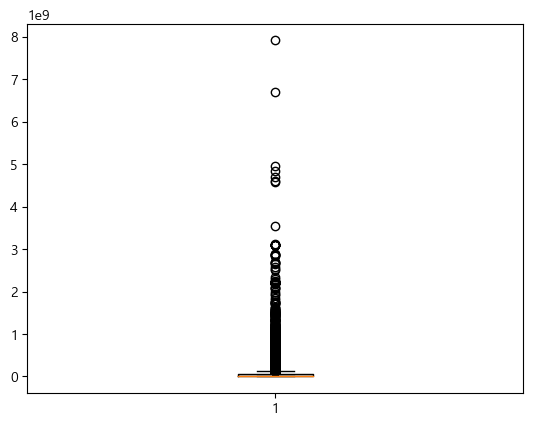

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

plt.boxplot(service_data['점포별_평균_매출_금액'])
plt.show()

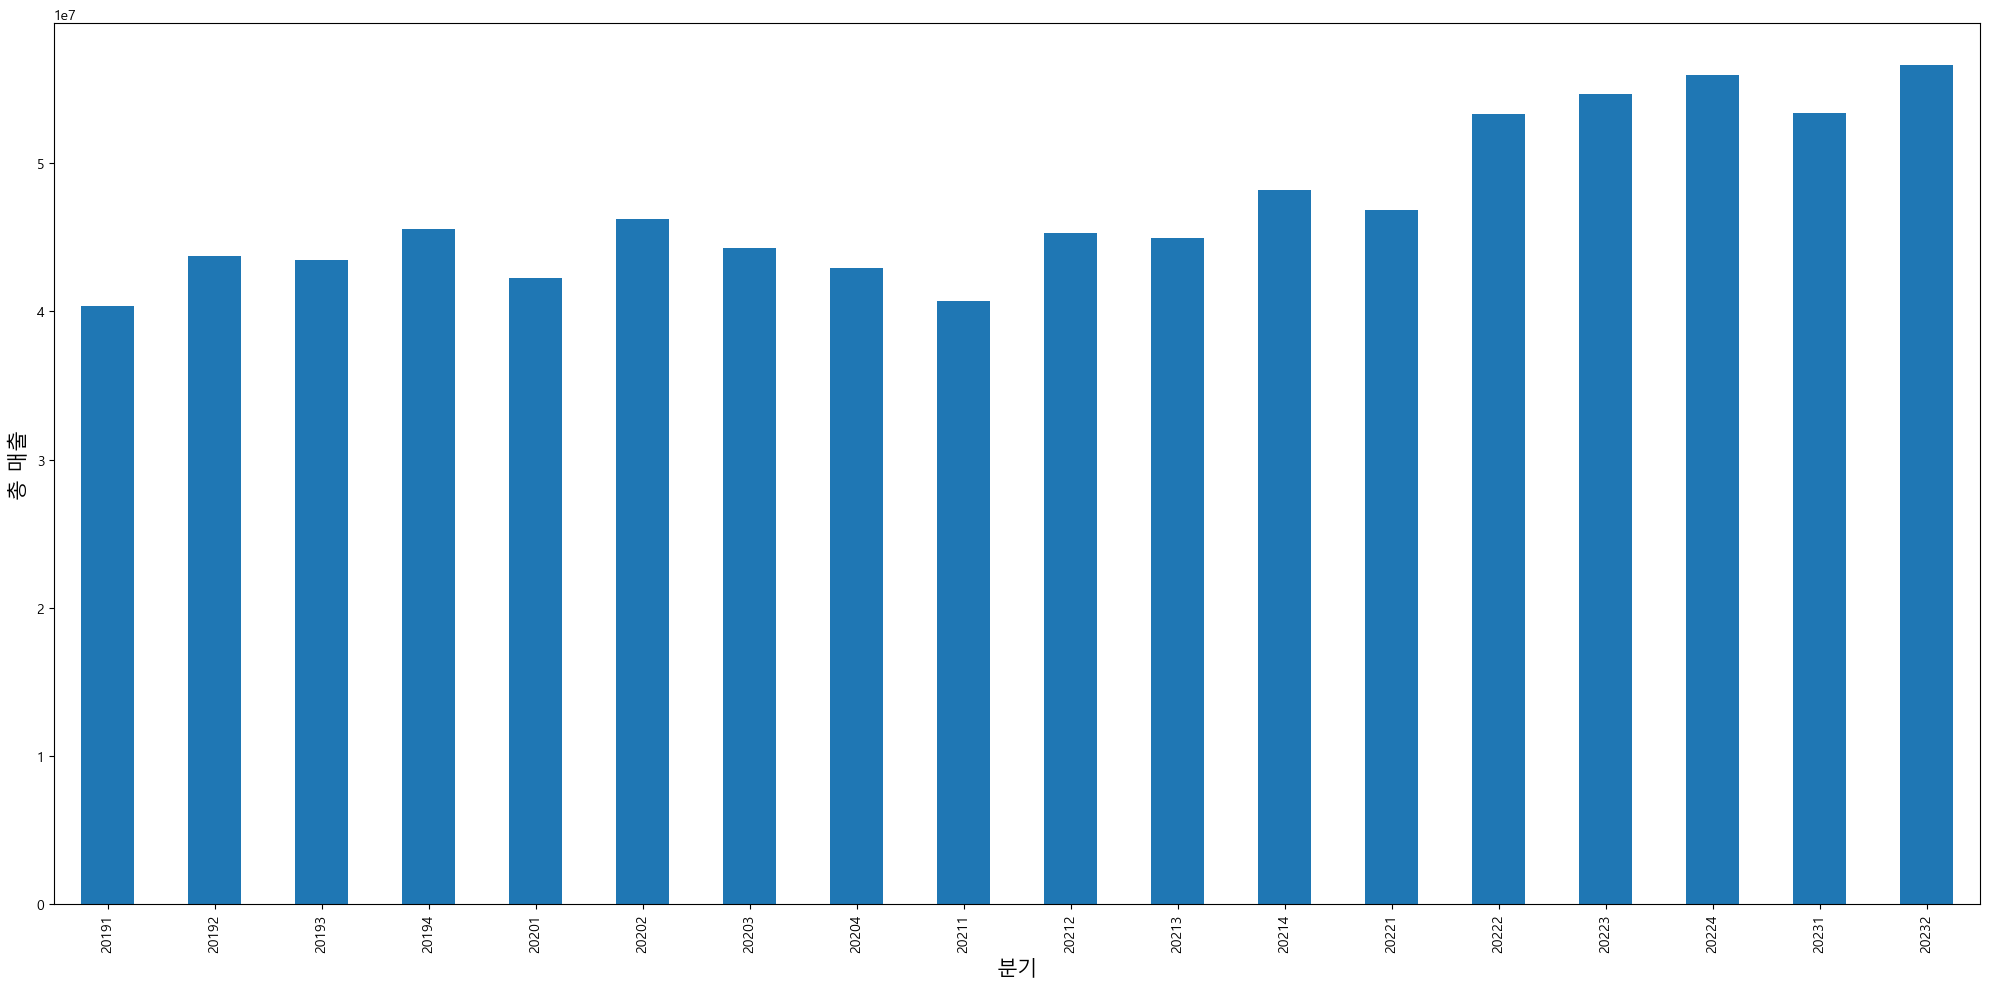

'_summary_\n1. 코로나(20.1-21.4)와 이후는 추세 차이 존재 -> 코로나 변수 생성\n2.  총 매출에서 반복되는 추세가 보임 → 분기(1,2,3,4) 생성\n'

In [119]:
## 분기별 추이 확인(전체)
quarter_sales = service_data.groupby(["기준_년분기_코드"])["점포별_평균_매출_금액"].mean()

# Matplotlib을 사용한 그룹별 바 플롯
plt.figure(figsize=(20,10))
quarter_sales.plot(kind='bar', legend=False)

plt.xlabel("분기", fontsize=15)
plt.ylabel('총 매출', fontsize=15)
#plt.title(var+' 총 매출-'+title , fontsize=20)

# 라벨이 겹치지 않도록 조정
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()
 
 
"""_summary_
1. 코로나(20.1-21.4)와 이후는 추세 차이 존재 -> 코로나 변수 생성
2.  총 매출에서 반복되는 추세가 보임 → 분기(1,2,3,4) 생성
"""

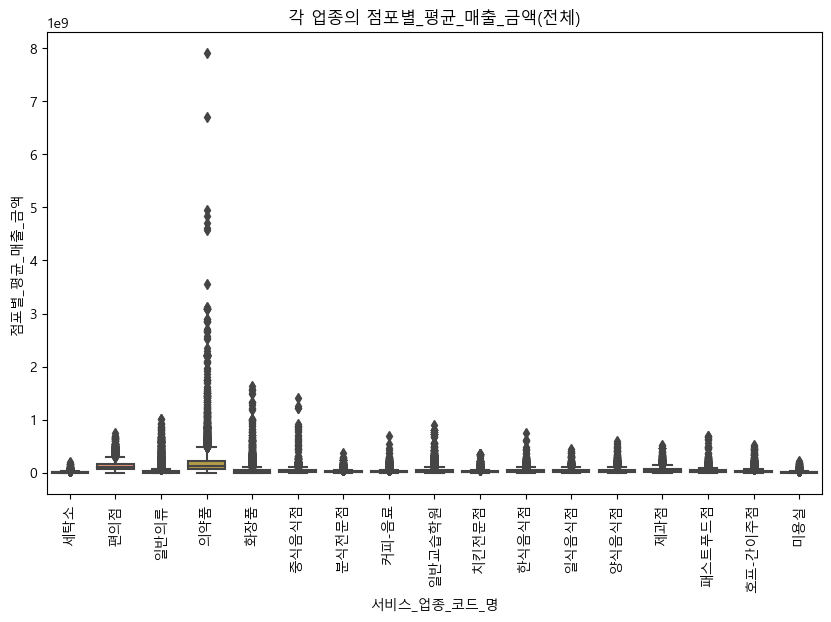

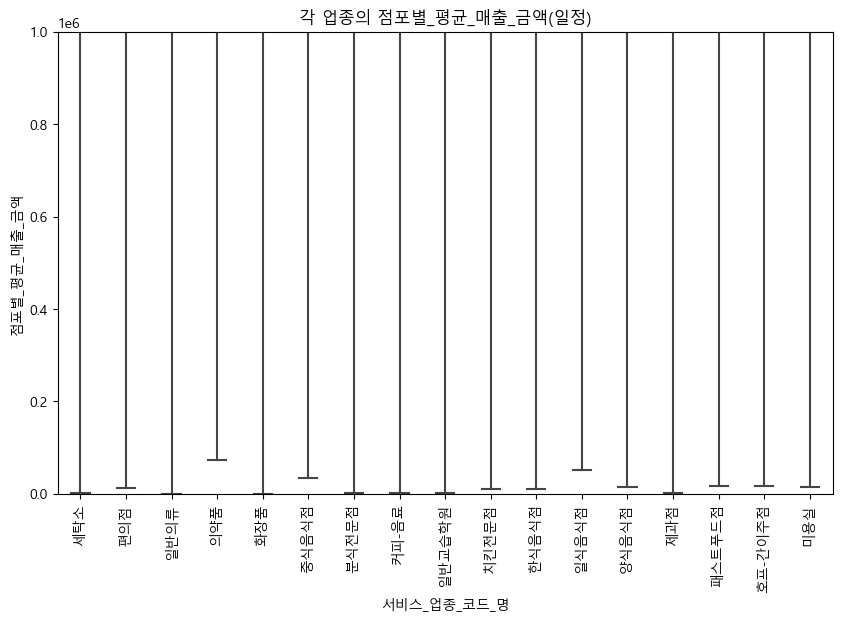

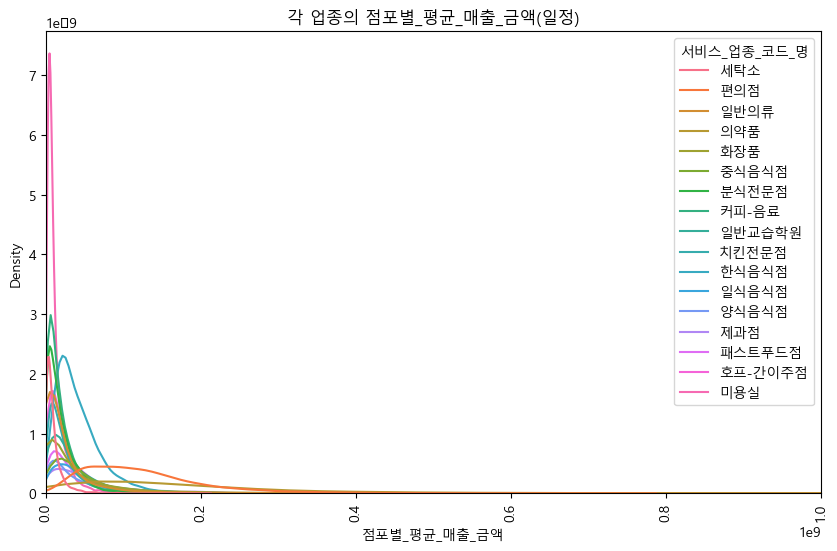

In [120]:
## 각 업종별 평균 매출 추이 파악 - 세탁소 에러 확인(제거), 100만원 이하 건수 삭제 시행
plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(전체)')
sns.boxplot(data=service_data, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(일정)')
sns.boxplot(data=service_data, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.ylim(0, 1000000)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(일정)')
sns.kdeplot(data=service_data, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xlim(0, 1000000000)
plt.xticks(rotation=90)
plt.show()

In [121]:
print('제거 전:',service_data.shape)
## [이슈4] 점포별_평균_매출_금액에 누락 값(이상치) 존재. 기준점을 세워 데이터 handling 진행
## [이슈5] 세탁소 제거 (현금 장사)
service_data_dropped = service_data[(service_data["점포별_평균_매출_금액"] > 1000000)&(service_data["서비스_업종_코드_명"]!="세탁소")]
print('제거 후:',service_data_dropped.shape)

제거 전: (182490, 184)
제거 후: (170445, 184)


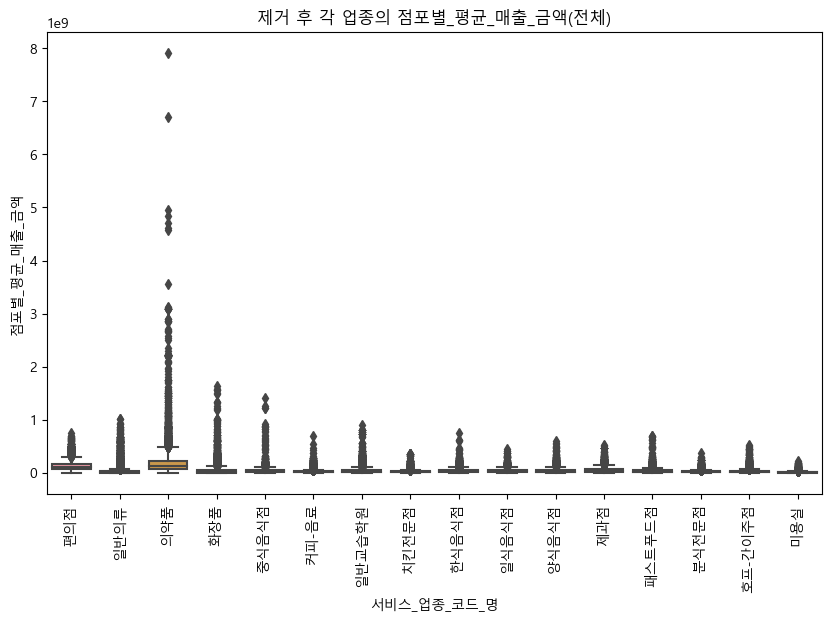

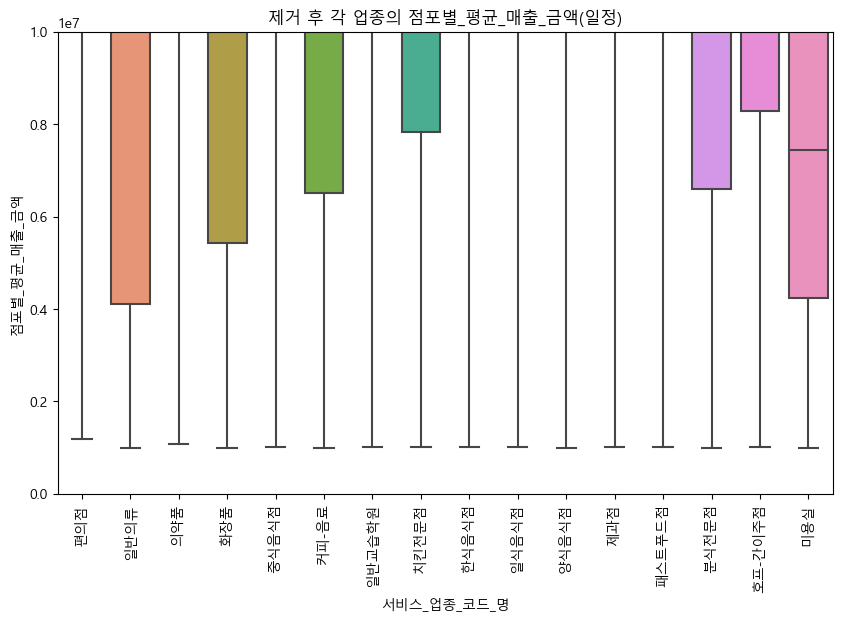

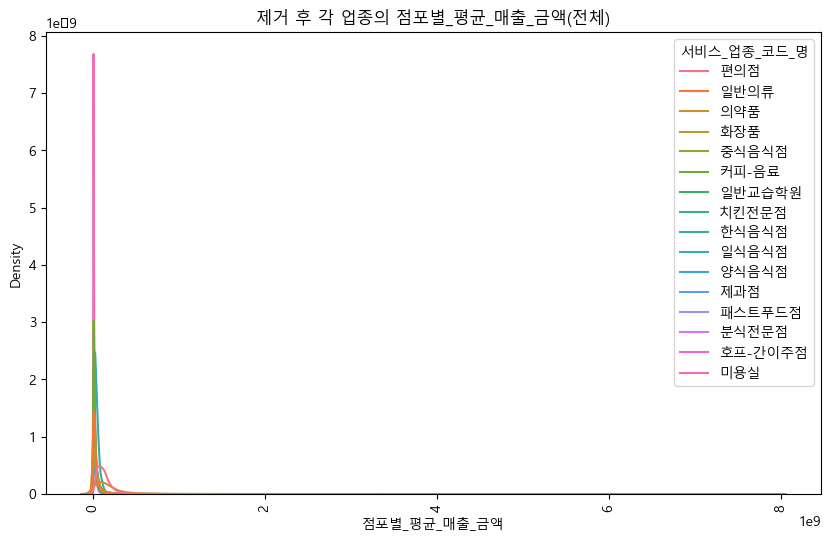

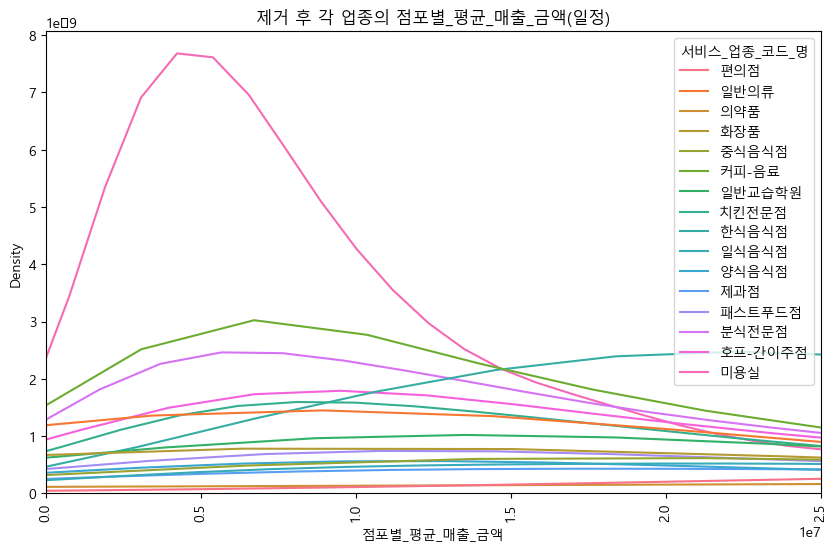

In [122]:
## 이상치 제거 후 각 업종별 평균 매출 추이 파악
plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(전체)')
sns.boxplot(data=service_data_dropped, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(일정)')
sns.boxplot(data=service_data_dropped, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.ylim(0, 10000000)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(전체)')
sns.kdeplot(data=service_data_dropped, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(일정)')
sns.kdeplot(data=service_data_dropped, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xlim(0, 25000000)
plt.xticks(rotation=90)
plt.show()

In [123]:
## 분기, 코로나 COL 추가
## 분기, 코로나 COL 추가
# 코로나 = 20201-20214
service_data_dropped["분기"] = service_data_dropped["기준_년분기_코드"].apply(lambda x: int(str(x)[-1]))
service_data_dropped["코로나_여부"] = service_data_dropped["기준_년분기_코드"].apply(lambda x: 1 if x<20221 else 0)
print(service_data_dropped.shape)
service_data_dropped[["기준_년분기_코드", "분기", "코로나_여부"]].sort_values("기준_년분기_코드")

(170445, 186)


,기준_년분기_코드,분기,코로나_여부
134,20191,1,1
11913,20191,1,1
11912,20191,1,1
11911,20191,1,1
11910,20191,1,1
...,...,...,...
325600,20232,2,0
325601,20232,2,0
325602,20232,2,0
325588,20232,2,0


### 발달상권만 추출

In [124]:
service_data_dropped_business = service_data_dropped[service_data_dropped['상권_구분_코드_명'] == '발달상권']
service_data_dropped_business = service_data_dropped_business.reset_index(drop=True)
service_data_dropped_business.shape

(50808, 186)

### csv 파일로 저장

In [125]:
service_data_dropped_business.to_csv('../../data/preprocessed data/market_service_data.csv', index=False)

## 모델 학습용 데이터

In [126]:
import pandas as pd

pd.set_option('display.max_columns', 500)

### 1. 해당 분기 매출 예측
- y: `점포별_평균_매출_금액`

In [127]:
estimate = pd.read_csv('../../data/preprocessed data/market_service_data.csv')
estimate.shape

(50808, 186)

In [128]:
drop_cols = ['당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

print(len(drop_cols))

48


In [129]:
estimate = estimate.drop(columns=drop_cols)
estimate.shape

(50808, 138)

In [130]:
estimate['점포별_평균_매출_금액'].describe()

count    5.080800e+04
mean     6.548046e+07
std      1.232595e+08
min      1.001802e+06
25%      1.784753e+07
50%      3.753451e+07
75%      7.327005e+07
max      7.913566e+09
Name: 점포별_평균_매출_금액, dtype: float64

In [131]:
estimate.to_csv('../../data/preprocessed data/market_service_data_estimate.csv', index=False)

### 2. 다음 분기 매출 예측
- y: `점포별_예상_평균_매출_금액`

In [132]:
predict = pd.read_csv('../../data/preprocessed data/market_service_data.csv')
predict.shape

(50808, 186)

In [133]:
drop_cols = ['당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

print(len(drop_cols))

48


In [134]:
predict = predict.drop(columns=drop_cols)
print(predict.shape)

(50808, 138)


y = `점포별_예상_평균_매출_금액`

현재시점이 2023년 2분기일 때, 
- `점포별_예상_평균_매출_금액`(2023년 3분기) → 다음 분기 매출 금액
- `전년도_점포별_평균_매출_금액`(2022년 3분기) → 예측할 분기의 전년도 매출 금액 

In [135]:
predict = predict.sort_values(by=['상권_구분_코드', '상권_코드', '서비스_업종_코드', '기준_년분기_코드'])

predict['점포별_예상_평균_매출_금액'] = predict['점포별_평균_매출_금액'].shift(-1) # '점포별_예상_평균_매출_금액' 컬럼 생성
predict['전년도_점포별_평균_매출_금액'] = predict['점포별_평균_매출_금액'].shift(3) # '전년도_점포별_평균_매출_금액' 컬럼 생성

predict = predict[(20194 < predict['기준_년분기_코드']) & (predict['기준_년분기_코드'] < 20233)]

In [136]:
predict[['기준_년분기_코드', '상권_코드_명', '서비스_업종_코드_명', '점포별_평균_매출_금액', '전년도_점포별_평균_매출_금액','점포별_예상_평균_매출_금액']].head(30)

,기준_년분기_코드,상권_코드_명,서비스_업종_코드_명,점포별_평균_매출_금액,전년도_점포별_평균_매출_금액,점포별_예상_평균_매출_금액
11285,20201,서대문역,한식음식점,4.719333e+07,5.051590e+07,4.551442e+07
16367,20202,서대문역,한식음식점,4.551442e+07,4.896730e+07,4.423201e+07
17966,20203,서대문역,한식음식점,4.423201e+07,5.609270e+07,4.379609e+07
21224,20204,서대문역,한식음식점,4.379609e+07,4.719333e+07,4.027509e+07
24761,20211,서대문역,한식음식점,4.027509e+07,4.551442e+07,4.652947e+07
27429,20212,서대문역,한식음식점,4.652947e+07,4.423201e+07,3.712618e+07
29140,20213,서대문역,한식음식점,3.712618e+07,4.379609e+07,5.459468e+07
31285,20214,서대문역,한식음식점,5.459468e+07,4.027509e+07,4.442844e+07
35767,20221,서대문역,한식음식점,4.442844e+07,4.652947e+07,6.238296e+07
38565,20222,서대문역,한식음식점,6.238296e+07,3.712618e+07,6.095079e+07


In [137]:
predict = predict.sort_index()
predict.to_csv('../../data/preprocessed data/market_service_data_predict.csv', index=False)

In [138]:
# 결측치 확인
# temp = predict.isnull().sum()
# temp[temp > 0]